In [2]:
import numpy as np 
import pandas as pd

In [3]:
iris = pd.read_csv("../DATA/iris.csv")

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X = iris.drop('species',axis=1)

In [6]:
y = iris['species']

In [7]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelBinarizer

In [27]:
# Lots of ways to one hot encode
# https://stackoverflow.com/questions/47573293/unable-to-transform-string-column-to-categorical-matrix-using-keras-and-sklearn
# https://stackoverflow.com/questions/35107559/one-hot-encoding-of-string-categorical-features

In [9]:
encoder = LabelBinarizer()

In [10]:
y = encoder.fit_transform(y)

In [13]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [16]:
scaler = MinMaxScaler()

In [17]:
# only fit in training set
# unseen test set
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))

#multiclass output
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(patience=10)

In [29]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(scaled_X_test, y_test), verbose=1 ,callbacks=[early_stop])

Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 0s 3ms/sample - loss: 1.1055 - accuracy: 0.6417 - val_loss: 1.0598 - val_accuracy: 0.6333
Epoch 2/300
120/120 [==============================] - 0s 84us/sample - loss: 1.1003 - accuracy: 0.6417 - val_loss: 1.0562 - val_accuracy: 0.6000
Epoch 3/300
120/120 [==============================] - 0s 91us/sample - loss: 1.0953 - accuracy: 0.6083 - val_loss: 1.0530 - val_accuracy: 0.6000
Epoch 4/300
120/120 [==============================] - 0s 92us/sample - loss: 1.0900 - accuracy: 0.5917 - val_loss: 1.0497 - val_accuracy: 0.6000
Epoch 5/300
120/120 [==============================] - 0s 97us/sample - loss: 1.0855 - accuracy: 0.5917 - val_loss: 1.0468 - val_accuracy: 0.6000
Epoch 6/300
120/120 [==============================] - 0s 100us/sample - loss: 1.0808 - accuracy: 0.5667 - val_loss: 1.0439 - val_accuracy: 0.6000
Epoch 7/300
120/120 [==============================] - 0s 101us/sample - loss: 

Epoch 112/300
120/120 [==============================] - 0s 90us/sample - loss: 0.6554 - accuracy: 0.8000 - val_loss: 0.6930 - val_accuracy: 0.8333
Epoch 113/300
120/120 [==============================] - 0s 100us/sample - loss: 0.6518 - accuracy: 0.8000 - val_loss: 0.6895 - val_accuracy: 0.8333
Epoch 114/300
120/120 [==============================] - 0s 96us/sample - loss: 0.6480 - accuracy: 0.8000 - val_loss: 0.6864 - val_accuracy: 0.8333
Epoch 115/300
120/120 [==============================] - 0s 89us/sample - loss: 0.6444 - accuracy: 0.7917 - val_loss: 0.6831 - val_accuracy: 0.8333
Epoch 116/300
120/120 [==============================] - 0s 85us/sample - loss: 0.6407 - accuracy: 0.7917 - val_loss: 0.6798 - val_accuracy: 0.8333
Epoch 117/300
120/120 [==============================] - 0s 92us/sample - loss: 0.6372 - accuracy: 0.7917 - val_loss: 0.6766 - val_accuracy: 0.8333
Epoch 118/300
120/120 [==============================] - 0s 86us/sample - loss: 0.6337 - accuracy: 0.8000 - val

120/120 [==============================] - 0s 93us/sample - loss: 0.3996 - accuracy: 0.9417 - val_loss: 0.4373 - val_accuracy: 0.9333
Epoch 223/300
120/120 [==============================] - 0s 94us/sample - loss: 0.3982 - accuracy: 0.9417 - val_loss: 0.4358 - val_accuracy: 0.9333
Epoch 224/300
120/120 [==============================] - 0s 94us/sample - loss: 0.3968 - accuracy: 0.9417 - val_loss: 0.4341 - val_accuracy: 0.9333
Epoch 225/300
120/120 [==============================] - 0s 102us/sample - loss: 0.3953 - accuracy: 0.9417 - val_loss: 0.4325 - val_accuracy: 0.9333
Epoch 226/300
120/120 [==============================] - 0s 105us/sample - loss: 0.3939 - accuracy: 0.9417 - val_loss: 0.4311 - val_accuracy: 0.9333
Epoch 227/300
120/120 [==============================] - 0s 97us/sample - loss: 0.3925 - accuracy: 0.9417 - val_loss: 0.4298 - val_accuracy: 0.9333
Epoch 228/300
120/120 [==============================] - 0s 96us/sample - loss: 0.3912 - accuracy: 0.9417 - val_loss: 0.4286

In [30]:
metrics = pd.DataFrame(model.history.history)

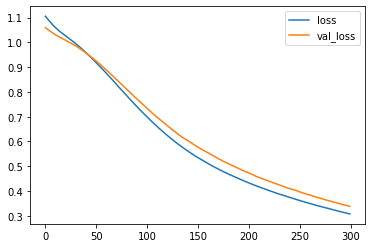

In [32]:
metrics[['loss', 'val_loss']].plot()

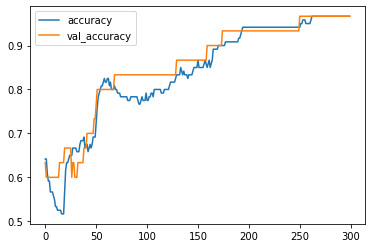

In [33]:
metrics[['accuracy', 'val_accuracy']].plot()

In [34]:
import joblib

model.save('final_iris_model.h5')
joblib.dump(scaler, 'iris_scaler.pkl')

['iris_scaler.pkl']

def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = model.predict_classes(flower)
    
    return classes[class_ind][0]